In [141]:
import pandas as pd

df = pd.read_csv('2023-03-27_steam_top_5000.csv')

df.shape

(5000, 17)

## 1. 특성 정리(전처리)
1. `score_rank`, `userscore`는 있는 게임이 거의 없으므로 제거한다.
2. `owners` : API에서 정확한 게임의 보유자 수를 제공하지 않고 범주형으로 제공하므로 범주형으로 처리한다
    - 조금 더 보기 간편하라고 단위를 m(ilion), k(ilo)로 바꿔서 넣음
    - `over 2m` 이랑 `2m ~ 5m` 중 뭐가 더 보기 좋은건지는 모르겠다
    - 범주형으로 바꾸고 정렬함(Tableau에서 적용되는지는 몰?루)
3. 평가 수 -`evaluation_count`
4. 좋아요&싫어요 비율 - `good_ratio` : $\frac{positive}{positive+negative}$
5. `free` : 0과 1로 구성되어 있으며, `initial_price`가 0이면 1, 아니면 0

In [142]:
# 1.
df = (df.drop(['score_rank', 'userscore'], axis = 1) # 필요 없는 데이터 제거
       .dropna() # publisher, developer에 있는 null값을 axis 기준으로 제거
     )

# 2. 
df['owners'].unique()
df['owners'].replace({'200,000,000 .. 500,000,000' : '200m ~ 500m',
                      '100,000,000 .. 200,000,000' : '100m ~ 200m',
                     '50,000,000 .. 100,000,000' : '50m ~ 100m',
                     '20,000,000 .. 50,000,000' : '20m ~ 50m',
                     '10,000,000 .. 20,000,000' : '10m ~ 20m',
                     '5,000,000 .. 10,000,000' : '5m ~ 10m',
                     '2,000,000 .. 5,000,000': '2m ~ 5m',
                     '1,000,000 .. 2,000,000' : '1m ~ 2m',
                     '500,000 .. 1,000,000' : '500k ~ 1m',
                     '200,000 .. 500,000' : '200k ~ 500k',
                     '100,000 .. 200,000' : '100k ~ 200k'}, inplace = True)

# object -> Categorical로 바꾸고 수동 sorting (Tableau에는 적용 안되겠지..?)
owners_order = pd.CategoricalDtype(['200m ~ 500m', '100m ~ 200m', '50m ~ 100m', 
                                    '20m ~ 50m', '10m ~ 20m', '5m ~ 10m',
                                   '2m ~ 5m', '1m ~ 2m', '500k ~ 1m', '200k ~ 500k',
                                   '100k ~ 200k'])
df['owners'] = df['owners'].astype(owners_order)
# df.sort_values('owners')

# 3. 
df['evaluation_count'] = df['positive'] + df['negative']

# 4.
df['good_ratio'] = df['positive'] / df['evaluation_count']
df.dropna(inplace = True)

# 5. 
df.loc[df['initialprice'] == 0, 'free'] = 'free'
df.loc[df['initialprice'] != 0, 'free'] = 'paid'


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   appid             4966 non-null   int64   
 1   name              4966 non-null   object  
 2   developer         4966 non-null   object  
 3   publisher         4966 non-null   object  
 4   positive          4966 non-null   int64   
 5   negative          4966 non-null   int64   
 6   owners            4966 non-null   category
 7   average_forever   4966 non-null   int64   
 8   average_2weeks    4966 non-null   int64   
 9   median_forever    4966 non-null   int64   
 10  median_2weeks     4966 non-null   int64   
 11  price             4966 non-null   int64   
 12  initialprice      4966 non-null   int64   
 13  discount          4966 non-null   int64   
 14  ccu               4966 non-null   int64   
 15  evaluation_count  4966 non-null   int64   
 16  good_ratio        4966 n

In [144]:
df.sort_values('good_ratio', ascending = False)

,appid,name,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,evaluation_count,good_ratio,free
2853,1393960,Battle Command,Ocean Software,Pixel Games UK,2,0,200k ~ 500k,0,0,0,0,499,499,0,0,2,1.0,paid
2431,1568440,Sands of Fire,Three-Sixty Pacific,Ziggurat,1,0,200k ~ 500k,0,0,0,0,699,699,0,0,1,1.0,paid
4074,1821060,Find The Sunbed,DS | Voxaol,DS | Voxaol,6,0,200k ~ 500k,0,0,0,0,199,199,0,0,6,1.0,paid
4559,1287180,Squares,Jason Swisher,Jason Swisher,1,0,100k ~ 200k,0,0,0,0,99,99,0,0,1,1.0,paid
4013,1469750,3x3 the immersive fiction chapter one : Math a...,"3x3.zero, Treecirle Media","3x3.zero, Treecircle Media",4,0,200k ~ 500k,0,0,0,0,499,499,0,0,4,1.0,paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,1619450,Heart of a Warrior,Techworld Communication,Techworld Communication,0,1,2m ~ 5m,0,0,0,0,1099,1099,0,0,1,0.0,paid
2925,1260920,Spirit of Adventure,Attic Entertainment Software,Unique Games,0,2,200k ~ 500k,0,0,0,0,899,899,0,0,2,0.0,paid
3449,905270,Merlin Soccer,Educational Games,Educational Games,0,1,200k ~ 500k,0,0,0,0,199,199,0,0,1,0.0,paid
4739,1678060,Tactical Vanguard Saga,Blacc Ski Weekend Industries,Blacc Ski Weekend Industries,0,2,100k ~ 200k,0,0,0,0,499,499,0,0,2,0.0,paid


In [145]:
df['evaluation_count'].describe(percentiles = [.05, .1, .15, .2])

count    4.966000e+03
mean     1.932164e+04
std      1.246802e+05
min      1.000000e+00
5%       1.935000e+02
10%      4.815000e+02
15%      7.517500e+02
20%      1.049000e+03
50%      3.711500e+03
max      7.060299e+06
Name: evaluation_count, dtype: float64

In [146]:
df[['owners', 'evaluation_count']]

,owners,evaluation_count
0,200m ~ 500m,1952248
1,50m ~ 100m,7060299
2,50m ~ 100m,622357
3,50m ~ 100m,2158116
4,50m ~ 100m,252574
...,...,...
4995,100k ~ 200k,17
4996,100k ~ 200k,477
4997,100k ~ 200k,1447
4998,100k ~ 200k,3824


In [147]:
(df[['owners', 'evaluation_count', 'good_ratio']]
     .sort_values('evaluation_count', ascending = False)
     .tail(100))

,owners,evaluation_count,good_ratio
1337,500k ~ 1m,21,0.666667
1211,500k ~ 1m,21,0.619048
2416,200k ~ 500k,20,0.550000
3649,200k ~ 500k,20,0.550000
1204,500k ~ 1m,19,0.684211
...,...,...,...
3088,200k ~ 500k,1,1.000000
3860,200k ~ 500k,1,1.000000
4312,200k ~ 500k,1,0.000000
2495,200k ~ 500k,1,1.000000


In [148]:
df.to_csv('2023-03-27_steam_top_5000_cleaned.csv')

# 데이터 탐색(with Tableau)

## 1. 보유자 수보다 CCU가 더 중요하다
![image](image2.PNG)

1. 게임을 가지고 있다고 해서 꼭 플레이하고 있는 것은 아니다.
    - `New world`처럼 **보유자 수에 비해 현재 플레이하고 있는 인원이 극도로 적은 케이스**가 있다.
    - `Dota 2`의 보유자 수가 가장 많지만, CCU가 가장 많은 게임은 `글옵(카운터 스트라이크 : 글로벌 오펜시브)`이다.
2. 보유자 수가 많은 게임들은 무료 게임이 많다
3. 그러나 CCU 측면에서도 독보적인 **상위 4개의 작품을 제외하면 게임의 유료 / 무료 여부에 CCU가 정해진다고 보기는 힘들다.**

## 2. 게임 보유자 수와 유/무료 여부에 따른 좋아요 / 싫어요 비율(Seaborn)

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = (df[['owners', 'free', 'name', 'evaluation_count', 'good_ratio']]
        .groupby(['owners', 'free'])
        .mean(['evaluation_count', 'good_ratio'])
        .reset_index()
        )
temp

,owners,free,evaluation_count,good_ratio
0,200m ~ 500m,free,1.952248e+06,0.826141
1,200m ~ 500m,paid,NaN,NaN
2,100m ~ 200m,free,NaN,NaN
3,100m ~ 200m,paid,NaN,NaN
4,50m ~ 100m,free,2.695814e+06,0.805743
5,50m ~ 100m,paid,2.525740e+05,0.699015
6,20m ~ 50m,free,3.269308e+05,0.832157
7,20m ~ 50m,paid,7.703168e+05,0.920308
8,10m ~ 20m,free,1.555835e+05,0.761723
9,10m ~ 20m,paid,3.333518e+05,0.890726


[Text(0, 0, '200m ~ 500m'),
 Text(1, 0, '100m ~ 200m'),
 Text(2, 0, '50m ~ 100m'),
 Text(3, 0, '20m ~ 50m'),
 Text(4, 0, '10m ~ 20m'),
 Text(5, 0, '5m ~ 10m'),
 Text(6, 0, '2m ~ 5m'),
 Text(7, 0, '1m ~ 2m'),
 Text(8, 0, '500k ~ 1m'),
 Text(9, 0, '200k ~ 500k'),
 Text(10, 0, '100k ~ 200k')]

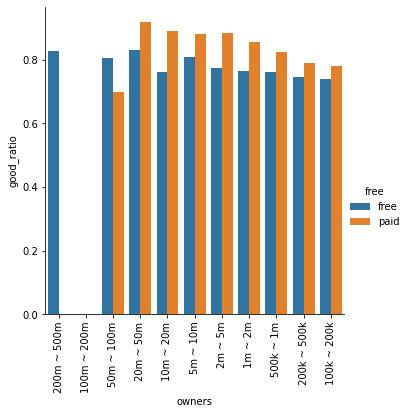

In [166]:
sns.catplot(data = temp,
            y = 'good_ratio', 
            x = 'owners',
            hue = 'free',
            kind = 'bar'
           )

plt.gca().set_xticklabels(plt.gca().get_xticklabels(), 
                          rotation = 90
    # ['' for _ in plt.gca().get_xticklabels()]
                        )

1. 일반적으로 무료 게임에 비해 유료 게임의 좋아요 비율이 높음
    - 물론 이는 평가수가 1개 이상인 게임들에 대해 적용되기 때문이며, 이를 나중에 정리할 것임
    
2. 보유자 수가 적을수록 좋아요 비율이 감소하는 추이를 보임. 
    - `50m~100m`의 총 샘플은 5개이며 유료 게임은 1개이므로 제외하고 생각하면 추이가 맞아 보임